# Explodatory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter for Job Name and Country

In [11]:
job_title = 'Data Analyst'
job_country = 'United States'

df_Jobs = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_country)].copy()

Text(0.5, 1.0, 'Counts of Job Locations for Data Analyst in United States')

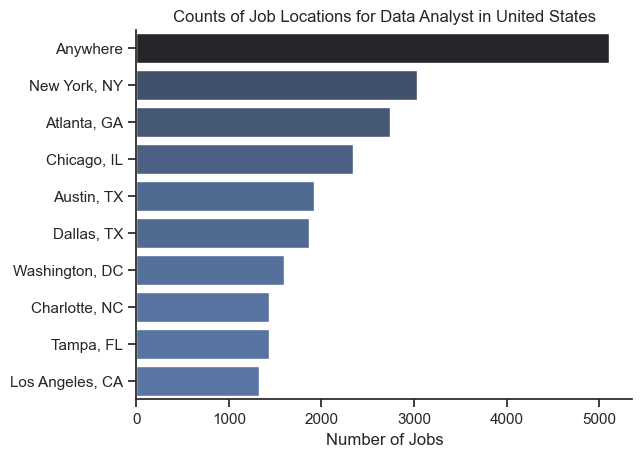

In [13]:
df_plot = df_Jobs['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title(f'Counts of Job Locations for {job_title} in {job_country}')

## Pie

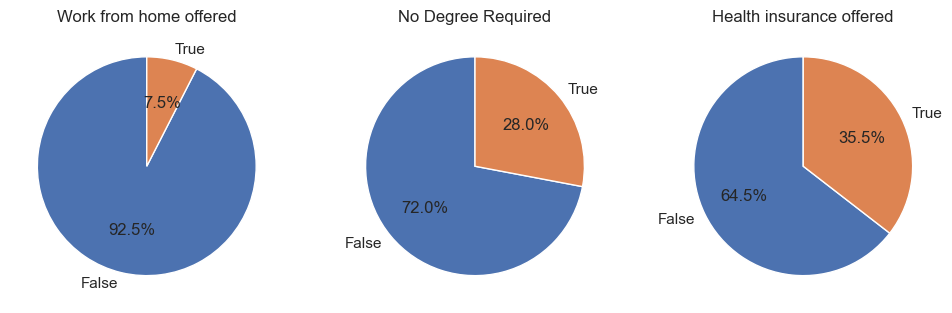

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from home offered',
    'job_no_degree_mention': 'No Degree Required',
    'job_health_insurance': 'Health insurance offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_Jobs[column].value_counts(), labels=[False, True], autopct='%1.1f%%', startangle = 90)
    ax[i].set_title(title)

plt.show()

Text(0.5, 1.0, 'Counts of Companies for Data Analyst in United States')

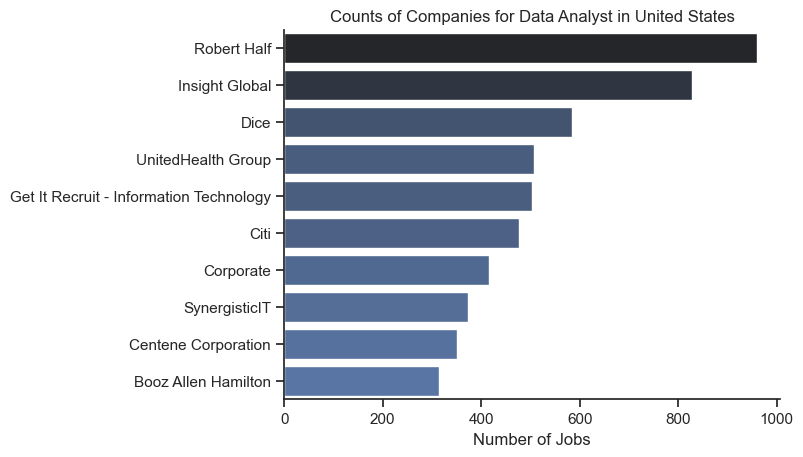

In [21]:
df_plot = df_Jobs['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title(f'Counts of Companies for {job_title} in {job_country}')